# Plotting Random Forest Metrics

Import the appropriate packages for plotting

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Make the plots inline

In [2]:
%matplotlib inline

Creates a 3d plot

In [3]:
def plot3d(x,y,z, xLab, yLab, zLab):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    for i in range(len(x)):
        ax.scatter(x[i], y[i], z[i])
    ax.set_xlabel(xLab)
    ax.set_ylabel(yLab)
    ax.set_zlabel(zLab)
    plt.show()

Creates a 2d plot

In [4]:
def plot2d(x,y, xLab,yLab, xlim= None, ylim = None):
    if xlim != None:
        plt.xlim(xlim[0],xlim[1])
    if ylim != None:
        plt.ylim(ylim[0],ylim[1])
    plt.plot(x,y,'bo')
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.show()

Creates a 2d plot where the size of the point is associated with the 3rd variable

In [5]:
def plot3dSize(x,y,z, xLab,yLab,zLab, xlim = None, ylim = None):
    if xlim != None:
        plt.xlim(xlim[0],xlim[1])
    if ylim != None:
        plt.ylim(ylim[0],ylim[1])
    plt.scatter(x,y,s=z)
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.show()

Creates a 2d plot where the color of the point is associated with the 3rd variable

In [6]:
def plot3dColor(x,y,z, xLab,yLab,zLab, xlim = None, ylim = None):
    if xlim != None:
        plt.xlim(xlim[0],xlim[1])
    if ylim != None:
        plt.ylim(ylim[0],ylim[1])
    plt.scatter(x,y,c=z)
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.show()

Creates a 2d plot where the color is assocated with the 3rd variable and the size is associated with the 4th variable 

In [7]:
def plot4dSC(x,y,z,a, xLab,yLab, xlim = None, ylim = None):
    if xlim != None:
        plt.xlim(xlim[0],xlim[1])
    if ylim != None:
        plt.ylim(ylim[0],ylim[1])
    plt.scatter(x,y,c=z, s= a)
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.show()

From the given .csv, returns data and headers

In [8]:
def getData(filename,header=False):
    f = open(filename,'r')
    lines = f.read().split('\r')
    data = []
    start = 0
    headers = []
    if header == True:
        start = 1
        headers = lines[0].split(",")
    for i in range(start,len(lines)):
        lines[i] = lines[i].strip().split(",")
        for j in range(len(lines[i])):
            if i == start:
                data.append([float(lines[i][j])])
            else:
                data[j].append(float(lines[i][j]))
    return data,headers

Plots all metrics against Number of Trees and Tree Depth

In [9]:
def plot_all_color(filename):
    data,header= getData(filename,True)
    for i in range(2,len(header)):
        print "Colors associated with "+ header[1]
        plt.title(header[i] + " vs. " + header[0])
        plot3dColor(data[0],data[i], data[1],header[0],header[i],header[1])
        print "Colors associated with "+ header[0]
        plt.title(header[i] + " vs. " + header[1])
        plot3dColor(data[1],data[i], data[0],header[1],header[i],header[0])

Plots ROC and PR Curves

In [10]:
def plotROCandPR(filename):
    data,header=getData(filename,True)
    headerIdx = {h:header.index(h) for h in header}
    
    #ROC Curve
    plt.title("ROC Curve")
    #Get trendline
    x = data[headerIdx["False Positive Rate"]]
    y =  data[headerIdx["True Positive Rate"]]
    z = np.polyfit(np.log(x),y,1)
    f = np.poly1d(z)
    print "y = " +str(z[0])+"ln(x) + "+str(z[1])
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(np.log(x_new))
    #Plot points and trendline
    plt.plot(x,y,'o',x_new, y_new)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    #PR Curve
    plt.title("PR Curve")
    #Get trendline
    x = data[headerIdx["Recall"]]
    y =  data[headerIdx["Precision"]]
    z = np.polyfit(x,y,2)
    f = np.poly1d(z)
    print f
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)
    #Plot points and trendline
    plt.plot(x,y,'o',x_new, y_new)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

##Plots

Plots the accuracy and precision for star and galaxy classification against Number of Trees and Tree Depth from the cfhtlens_matched.csv data 

Colors associated with depth


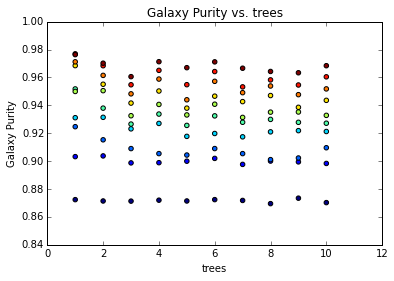

Colors associated with trees


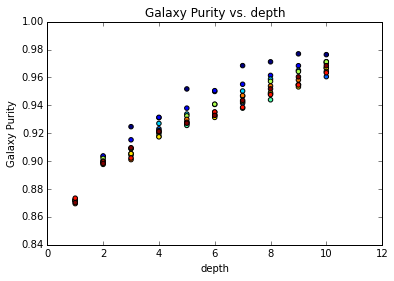

Colors associated with depth


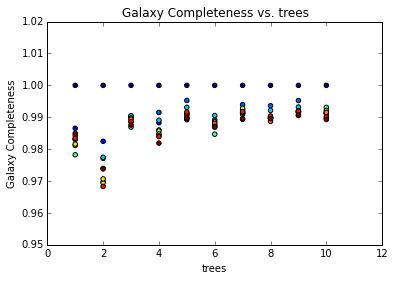

Colors associated with trees


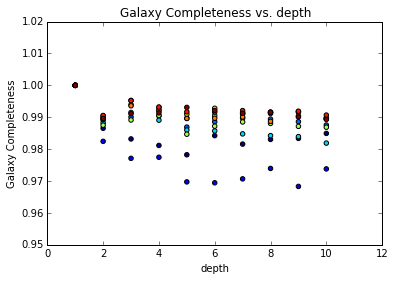

Colors associated with depth


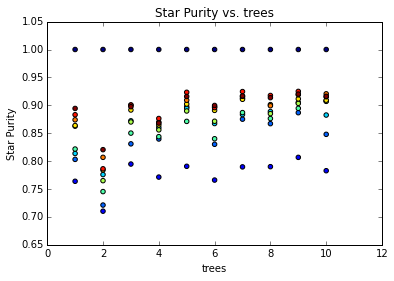

Colors associated with trees


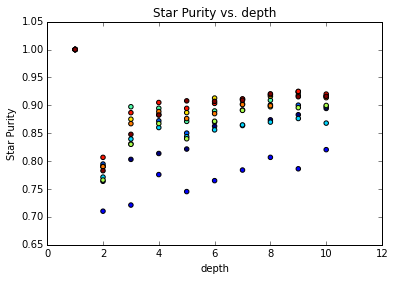

Colors associated with depth


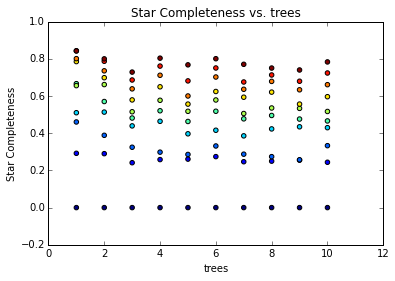

Colors associated with trees


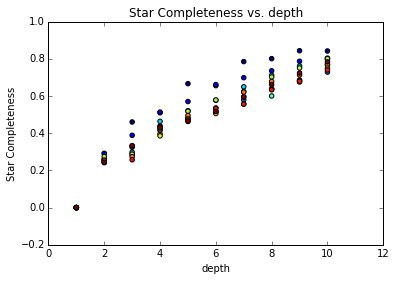

Colors associated with depth


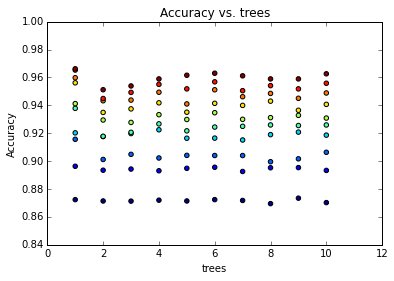

Colors associated with trees


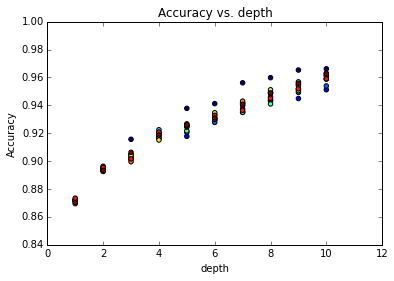

In [11]:
plot_all_color('data/Classification_data.csv')

Plots metrics averaged over 5 trials vs Number of Trees and Tree Depth from cfhtlens_matched.csv data

Colors associated with Depth


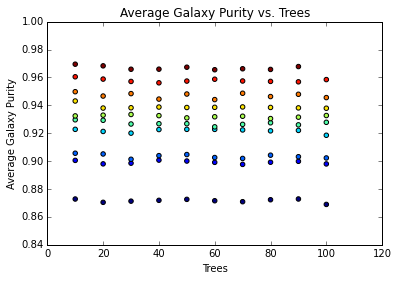

Colors associated with Trees


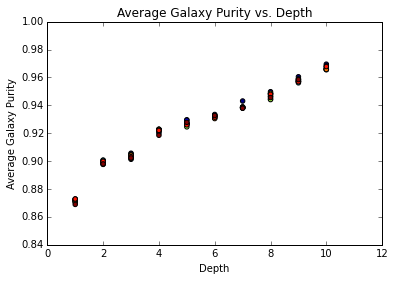

Colors associated with Depth


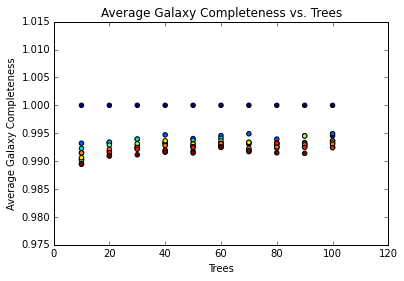

Colors associated with Trees


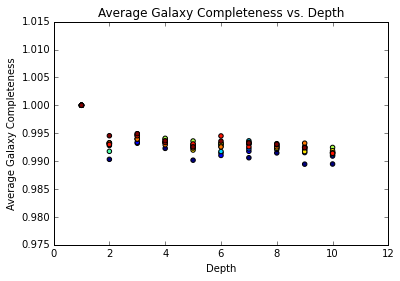

Colors associated with Depth


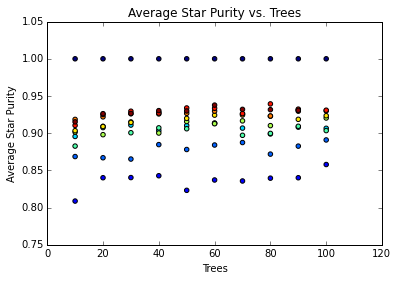

Colors associated with Trees


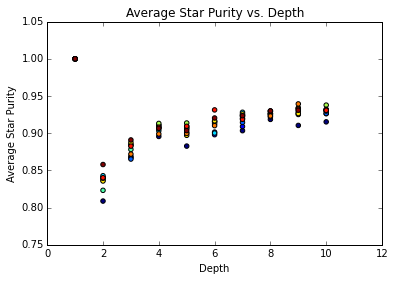

Colors associated with Depth


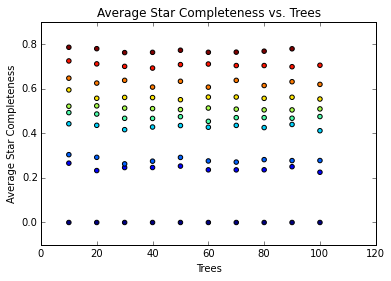

Colors associated with Trees


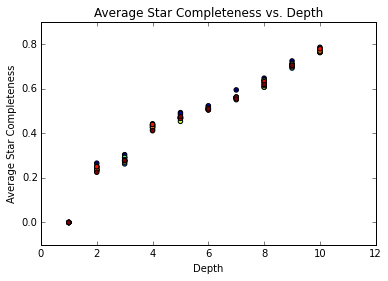

Colors associated with Depth


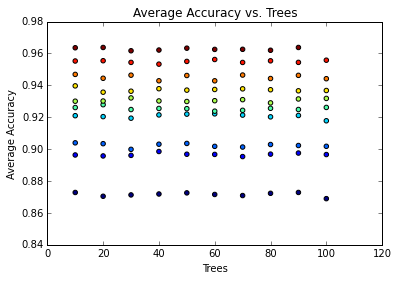

Colors associated with Trees


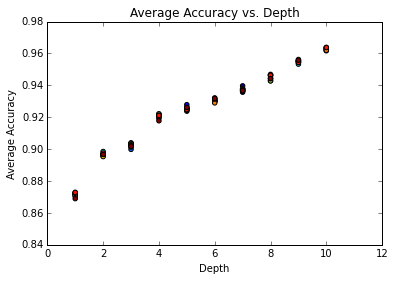

Colors associated with Depth


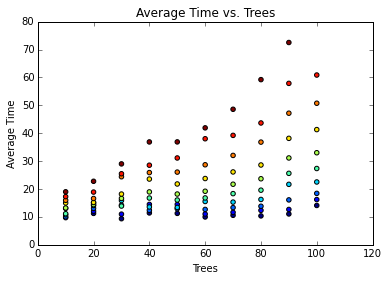

Colors associated with Trees


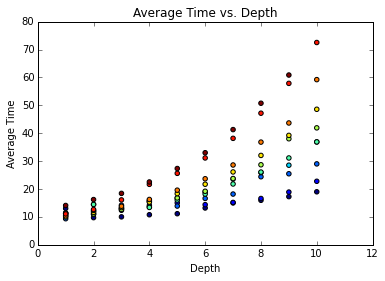

In [12]:
plot_all_color('data/Averaged_classification_data.csv')

Data generated using 10 trees with a depth of 4 from cfhtlens_matched.csv data

###ROC and PR Curves

y = 0.121736777584ln(x) + 1.00469813073


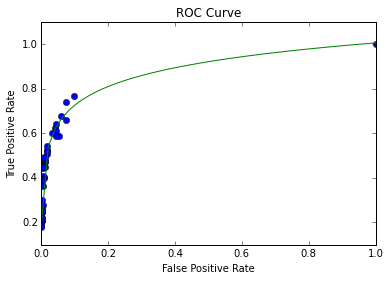

        2
-1.245 x + 0.4336 x + 0.914


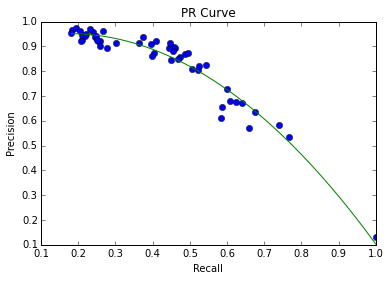

In [13]:
plotROCandPR("data/ROCandPR.csv")